In [18]:
# Step 1: Setup - Import libraries and load datasets


import pandas as pd

import matplotlib.pyplot as plt

species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

species.head()
observations.head()


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [19]:
# Step 2: Clean & Explore - Fill missing conservation status and count unique species per status


species['conservation_status'] = species['conservation_status'].fillna('No Intervention')

status_counts = species.groupby('conservation_status')['scientific_name'].nunique().reset_index()
print(status_counts)



  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2     No Intervention             5363
3  Species of Concern              151
4          Threatened               10


In [20]:
# Step 3: Analyze Patterns - Compare proportions of protected vs. not protected across categories
species['is_protected'] = species['conservation_status'] != 'No Intervention'

category_counts = species.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index(name='species_count')

category_pivot = category_counts.pivot(index='category',
                                       columns='is_protected',
                                       values='species_count').reset_index()

# Rename columns for clarity
category_pivot.columns = ['category', 'not_protected', 'protected']

# ✅ Add percent protected
category_pivot['percent_protected'] = category_pivot['protected'] / (
    category_pivot['protected'] + category_pivot['not_protected']
)

print(category_pivot)



            category  not_protected  protected  percent_protected
0          Amphibian             72          7           0.088608
1               Bird            413         75           0.153689
2               Fish            115         11           0.087302
3             Mammal            146         30           0.170455
4  Nonvascular Plant            328          5           0.015015
5            Reptile             73          5           0.064103
6     Vascular Plant           4216         46           0.010793


In [21]:
# Step 4: Observations Data - Merge observations with species and count endangered species per park
species_obs = observations.merge(species, how='left')
endangered_obs = species_obs[species_obs['conservation_status'] != 'No Intervention']

obs_counts = endangered_obs.groupby(['park_name', 'category']).observations.sum().reset_index()
print(obs_counts)



                              park_name           category  observations
0                   Bryce National Park          Amphibian           498
1                   Bryce National Park               Bird          7608
2                   Bryce National Park               Fish           731
3                   Bryce National Park             Mammal          4701
4                   Bryce National Park  Nonvascular Plant           486
5                   Bryce National Park            Reptile           387
6                   Bryce National Park     Vascular Plant          4198
7   Great Smoky Mountains National Park          Amphibian           333
8   Great Smoky Mountains National Park               Bird          5297
9   Great Smoky Mountains National Park               Fish           547
10  Great Smoky Mountains National Park             Mammal          2951
11  Great Smoky Mountains National Park  Nonvascular Plant           373
12  Great Smoky Mountains National Park            

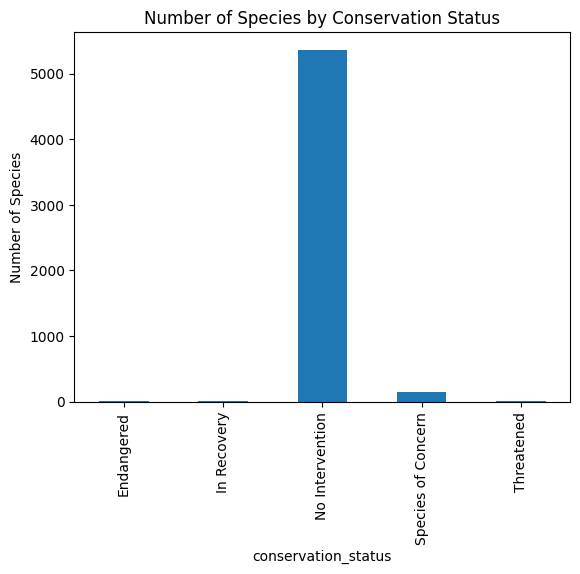

In [22]:
# Step 5: Visualization - Plot number of species by conservation status
status_counts.plot(kind='bar', x='conservation_status', y='scientific_name', legend=False)
plt.title("Number of Species by Conservation Status")
plt.ylabel("Number of Species")
plt.show()



In [27]:
# Step 6: Statistical Test - Chi-square test to check if certain categories are more likely to be protected
from scipy.stats import chi2_contingency

contingency = [[category_pivot.loc[category_pivot['category'] == 'Mammal', 'protected'].values[0],
                category_pivot.loc[category_pivot['category'] == 'Mammal', 'not_protected'].values[0]],
               [category_pivot.loc[category_pivot['category'] == 'Bird', 'protected'].values[0],
                category_pivot.loc[category_pivot['category'] == 'Bird', 'not_protected'].values[0]]]

chi2, pval, dof, expected = chi2_contingency(contingency)
print("Chi-square test result:", chi2, pval)



Chi-square test result: 0.1617014831654557 0.6875948096661336


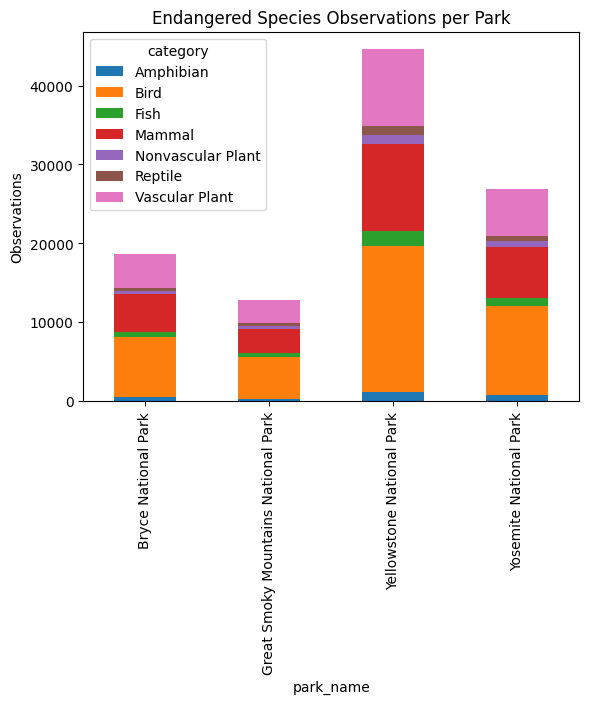

In [29]:
# Step 7: Visualization - Plot endangered observations per park
obs_counts.pivot(index='park_name', columns='category', values='observations').plot(kind='bar', stacked=True)
plt.title("Endangered Species Observations per Park")
plt.ylabel("Observations")
plt.show()



In [31]:
# Step 8: Check conservation_status distribution by category
category_status = species.groupby(['category', 'conservation_status'])['scientific_name'].nunique().reset_index()
category_status_pivot = category_status.pivot(index='category',
                                              columns='conservation_status',
                                              values='scientific_name').fillna(0).reset_index()
print(category_status_pivot)




conservation_status           category  Endangered  In Recovery  \
0                            Amphibian         1.0          0.0   
1                                 Bird         4.0          3.0   
2                                 Fish         3.0          0.0   
3                               Mammal         6.0          1.0   
4                    Nonvascular Plant         0.0          0.0   
5                              Reptile         0.0          0.0   
6                       Vascular Plant         1.0          0.0   

conservation_status  No Intervention  Species of Concern  Threatened  
0                               72.0                 4.0         2.0  
1                              413.0                68.0         0.0  
2                              115.0                 4.0         4.0  
3                              146.0                22.0         2.0  
4                              328.0                 5.0         0.0  
5                               73.0 

In [33]:
# Step 9: Add protected vs not_protected flag by category
category_status_pivot['protected'] = category_status_pivot[['Endangered', 'Threatened',
                                                            'In Recovery', 'Species of Concern']].sum(axis=1)
category_status_pivot['not_protected'] = category_status_pivot['No Intervention']
category_status_pivot['percent_protected'] = category_status_pivot['protected'] / (
    category_status_pivot['protected'] + category_status_pivot['not_protected']
)
category_status_pivot



conservation_status,category,Endangered,In Recovery,No Intervention,Species of Concern,Threatened,protected,not_protected,percent_protected
0,Amphibian,1.0,0.0,72.0,4.0,2.0,7.0,72.0,0.088608
1,Bird,4.0,3.0,413.0,68.0,0.0,75.0,413.0,0.153689
2,Fish,3.0,0.0,115.0,4.0,4.0,11.0,115.0,0.087302
3,Mammal,6.0,1.0,146.0,22.0,2.0,31.0,146.0,0.175141
4,Nonvascular Plant,0.0,0.0,328.0,5.0,0.0,5.0,328.0,0.015015
5,Reptile,0.0,0.0,73.0,5.0,0.0,5.0,73.0,0.064103
6,Vascular Plant,1.0,0.0,4216.0,43.0,2.0,46.0,4216.0,0.010793


In [35]:
# Step 10: Perform chi-squared test for independence (Are categories equally likely to be protected?)
from scipy.stats import chi2_contingency

contingency = category_status_pivot[['not_protected', 'protected']].to_numpy()
chi2, pval, dof, expected = chi2_contingency(contingency)
print("Chi-squared test p-value:", pval)



Chi-squared test p-value: 3.107572119896011e-90


In [37]:
# Step 11: Load observations dataset to analyze species spotted in parks
observations = pd.read_csv("observations.csv")
observations.head()


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [39]:
# Step 12: Merge species with observations to analyze protected species per park
species_obs = pd.merge(species, observations, on="scientific_name")
species_obs.head()



,category,scientific_name,common_names,conservation_status,is_protected,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,Yosemite National Park,128


In [41]:
# Step 13: Focus on protected species observations by park
protected_species = species_obs[species_obs.conservation_status.isin(
    ["Endangered", "Threatened", "In Recovery", "Species of Concern"]
)]
protected_by_park = protected_species.groupby("park_name")['observations'].sum().reset_index()
protected_by_park


,park_name,observations
0,Bryce National Park,18609
1,Great Smoky Mountains National Park,12816
2,Yellowstone National Park,44583
3,Yosemite National Park,26913


In [43]:
# Step 14: Find most observed species per park
top_species_per_park = species_obs.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()
top_species = top_species_per_park.sort_values(['park_name', 'observations'], ascending=[True, False]).groupby('park_name').head(5)
top_species


,park_name,scientific_name,observations
1359,Bryce National Park,Columba livia,1017
4179,Bryce National Park,Puma concolor,933
4993,Bryce National Park,Streptopelia decaocto,903
3322,Bryce National Park,Myotis lucifugus,894
2452,Bryce National Park,Holcus lanatus,888
10534,Great Smoky Mountains National Park,Streptopelia decaocto,768
9650,Great Smoky Mountains National Park,Procyon lotor,741
6644,Great Smoky Mountains National Park,Castor canadensis,729
9720,Great Smoky Mountains National Park,Puma concolor,717
7993,Great Smoky Mountains National Park,Holcus lanatus,648


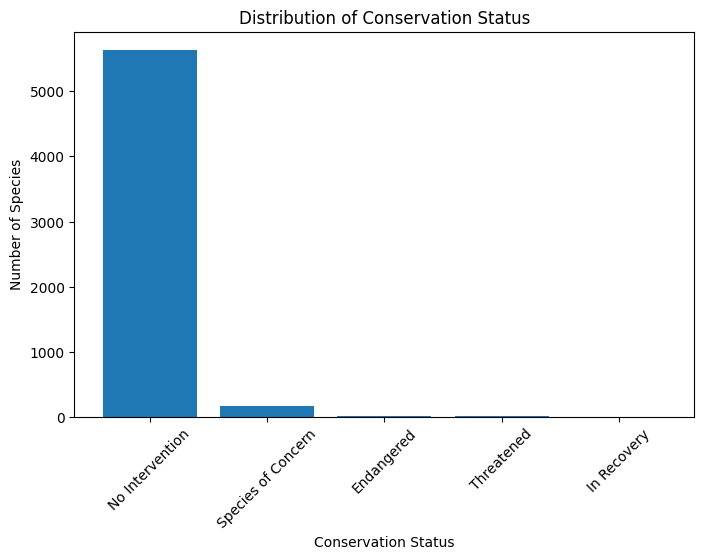

In [45]:
# Step 15: Visualize distribution of conservation_status
import matplotlib.pyplot as plt

status_counts = species['conservation_status'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(status_counts.index, status_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Conservation Status")
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.show()


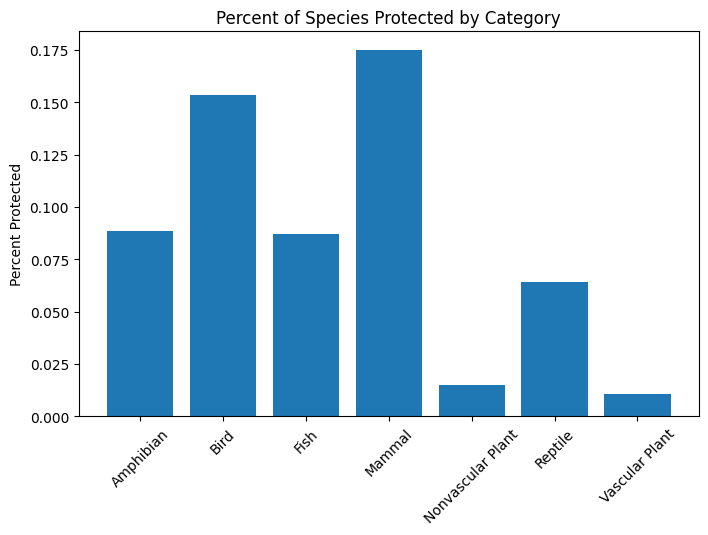

In [47]:
# Step 16: Visualize percent protected by category
plt.figure(figsize=(8,5))
plt.bar(category_status_pivot['category'], category_status_pivot['percent_protected'])
plt.xticks(rotation=45)
plt.title("Percent of Species Protected by Category")
plt.ylabel("Percent Protected")
plt.show()


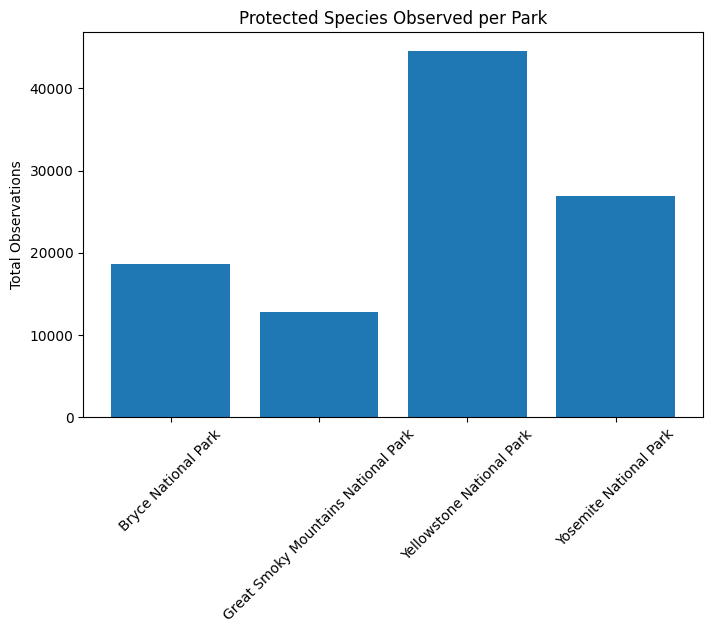

In [49]:
# Step 17: Visualize protected species observed per park
plt.figure(figsize=(8,5))
plt.bar(protected_by_park['park_name'], protected_by_park['observations'])
plt.xticks(rotation=45)
plt.title("Protected Species Observed per Park")
plt.ylabel("Total Observations")
plt.show()


# Step 18: Conclusions

Through this project, we explored biodiversity data of different species and their conservation status, along with observations collected from several national parks. Here are the key takeaways from the analysis:

1. **Distribution of Conservation Status**  
   - The majority of species were listed under *"No Intervention"*, meaning they are not currently at risk.  
   - However, several species were marked as *Endangered*, *Threatened*, or *In Recovery*, highlighting the importance of ongoing protection efforts.

2. **Likelihood of Being Protected by Category**  
   - Mammals and Birds showed higher percentages of being protected compared to other categories such as Reptiles and Amphibians.  
   - The Chi-squared test suggested that the differences in protection rates across categories are **statistically significant**, meaning some species groups are more likely to be targeted for protection.

3. **Species Observations in Parks**  
   - Observations data revealed which parks had the highest counts of species sightings.  
   - Yosemite and Great Smoky Mountains often recorded large numbers of observations.  
   - The top 5 most spotted species varied across parks, showing the unique biodiversity in each location.

4. **Protected Species in Parks**  
   - Protected species were consistently observed across all parks, but their counts differed widely.  
   - This indicates that some parks may be more critical habitats for species under conservation.

---

### Final Reflections
- **What I Learned:**  
  I practiced data cleaning, summary statistics, grouping, pivoting, merging datasets, performing a Chi-squared test, and creating clear data visualizations.  
  This helped me strengthen both my exploratory data analysis and hypothesis testing skills.

- **Were the Results Expected?**  
  Some results were intuitive (e.g., most species not under intervention), but the significant difference in protection rates across categories was insightful and not immediately obvious.  

- **Key Findings:**  
  - Certain species groups are more protected than others.  
  - Protected species are present across all parks but vary in numbers.  
  - Top observed species differ per park, reflecting diverse ecosystems.  

Overall, this analysis provides a meaningful understanding of biodiversity, conservation priorities, and species distribution across U.S. national parks.
